<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/estudos_de_python_em_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @# markdown codigo é o ticker na B3. Data é ano/mes/dia.

codigo  = 'beef3'       #@param {type:"string"}
inicio  = '2020-01-08'  #@param {type:"date"}
termino = '2022-08-31'  #@param {type:"date"}


usar_periodo = True #@param {type:"boolean"}
periodo = '3y' #@param ['1d','5d','1mo','3mo','6mo','1y','2y','3y','5y','10y','ytd','max']

codigo = codigo.upper()

In [2]:
#@markdown Importação do pacotes do python

import warnings
warnings.filterwarnings('ignore')

import datetime
from datetime import datetime
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm


!pip install -q googletrans==4.0.0rc1
from googletrans import Translator
translator = Translator()
from google.colab import data_table


try:
  import yfinance as yf
except:
  !pip install -q yfinance --upgrade
  import yfinance as yf
try:
  import quandl
except:
  !pip install -q quandl
  import quandl
finally:
  quandl.ApiConfig.api_key = 'XjVtHyrCSxB4xG9iyLUx'
try:
  import investpy as inv
except:
  !pip install -q investpy
  import investpy as inv

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

#!pip install -q plotly --upgrade
## plotly
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
from plotly.offline import iplot, init_notebook_mode

## sns
import seaborn as sns

## cufflinks
import cufflinks as cf
cf.go_offline()

from IPython.display import clear_output 
clear_output()

IBrA = [
    'RRRP3', 'ALPA4', 'ABEV3', 'AMER3', 'ASAI3', 'AZUL4', 'B3SA3', 'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 
    'BBDC4', 'BRAP4','BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 
    'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 
    'ENBR3', 'ENGI11','ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 
    'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3','ITSA4','ITUB4', 'JBSS3', 'JHSF3', 'KLBN11', 'RENT3', 
    'LWSA3', 'LREN3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 
    'PRIO3', 'PETZ3', 'POSI3', 'QUAL3', 'RADL3', 'RDOR3','RAIL3', 'SBSP3', 'SANB11', 'CSNA3', 'SLCE3', 
    'SULA11', 'SUZB3','TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3','VIIA3', 'VBBR3', 
    'WEGE3', 'YDUQ3', 'NGRD3', 'POSI3' , 'SQIA3' , 'VLID3' 
    ] 

In [3]:
## RENDERIZAÇÂO DE GRAFICOS

#import plotly.io as pio
#pio.renderers
    
## uso o 'svg' pra enviar para o github, porem perde o modo interativo
!pip install -Uq kaleido
plotly.io.renderers.default = 'png'
#plotly.io.renderers.default = 'colab'

In [4]:
#@markdown A empresa e Indicadores fundamentalistas (de fundamentus.com.br)

try:
  desc = inv.get_stock_company_profile(stock = codigo , country = "Brazil")
except:
  print(codigo)
else:
  result = translator.translate(desc['desc'], dest='pt')
  #print(result.text)
  import textwrap
  print("\n".join(textwrap.wrap(result.text,118)))

import requests
url = 'https://www.fundamentus.com.br/resultado.php'

#pra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#junta com a requests
r = requests.get(url, headers=header)
# read_html do pandas põe a tabela num dataframe
funds = pd.read_html(r.text, decimal=',', thousands='.')
dfunds = pd.DataFrame(funds[0])

(dfunds.loc[dfunds['Papel']==codigo]).set_index('Papel')

A Minerva SA é uma empresa brasileira envolvida principalmente na produção e venda de carne bovina.As atividades da
empresa são divididas em dois segmentos de negócios: carne e gado.A divisão de carne está envolvida na produção e
venda de carne fresca.Esse segmento inclui processamento de carne bovina, carne de porco e aves, bem como produção e
venda de subprodutos de gado, como couros ou miúrios.A divisão de gado se concentra na exportação de gado vivo.A
empresa opera matadouros no Brasil, paraguai Uruguai, Colômbia e Argentina, planta de processamento de carne no Brasil
e duas plantas de processamento de proteínas na Argentina.A empresa possui inúmeras subsidiárias, como a Minerva Dawn
Farms Industria e Comercio de Proteinas SA, CSAP Companhia Sul Americana de Pecuaria SA e Athena Foods SA, entre
outros.


,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
Papel,,,,,,,,,,,,,,,,,,,,
BEEF3,15.51,11.33,15.14,0.298,"3,62%",0.442,1.58,3.73,-1.52,6.29,5.43,"7,98%","2,63%",1.7,"26,28%","133,61%",85221600.0,621997000.0,23.22,"19,94%"


Download dos preços

In [5]:
#@ markdown Download dos dados do ativo(s) e do índice

ativo = pd.DataFrame()
ibov = pd.DataFrame()
if usar_periodo : 
  ativo = yf.download(codigo+'.SA', period = periodo , actions=True , progress = False)
  ibov = yf.download('^BVSP', period = periodo , actions=True , progress = False)   
else : 
  ativo = yf.download(codigo+'.SA' , start=inicio , end=termino , actions=True ,  progress = False)
  ibov = yf.download('^BVSP', start=inicio , end=termino , actions=True, progress = False)  

Dividendos no período

In [6]:
print(ativo['Dividends'][ativo['Dividends']!=0].count() , 'proventos pagos no período, total', round(ativo['Dividends'].sum(),2))
print(ativo['Dividends'][ativo['Dividends']!=0])


6 proventos pagos no período, total 1.94
Date
2020-11-09 00:00:00-03:00    0.257832
2021-01-04 00:00:00-03:00    0.042734
2021-04-13 00:00:00-03:00    0.729812
2021-11-11 00:00:00-03:00    0.348843
2022-04-28 00:00:00-03:00    0.342330
2022-08-18 00:00:00-03:00    0.219220
Name: Dividends, dtype: float64


# preço


In [7]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
qual_preco = 'Adj Close' #@param ['Open','High','Close','Low','Adj Close']


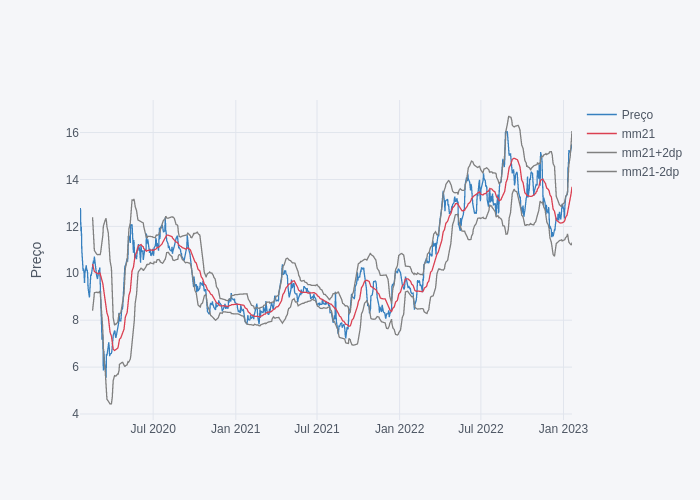

In [9]:
preco = pd.DataFrame()
preco['Preço'] = ativo[qual_preco]
preco['ibov'] = ibov[qual_preco]
preco['mm21'] = preco['Preço'].rolling(21).mean()
Mov_SD = preco['Preço'].rolling(21).std(ddof=0)
preco['mm21+2dp'] = preco['mm21'] + 2*Mov_SD
preco['mm21-2dp'] = preco['mm21'] - 2*Mov_SD
preco.iplot(keys = ['Preço','mm21','mm21+2dp','mm21-2dp'], yTitle='Preço' , 
            colors=['blue','red','gray','gray'])

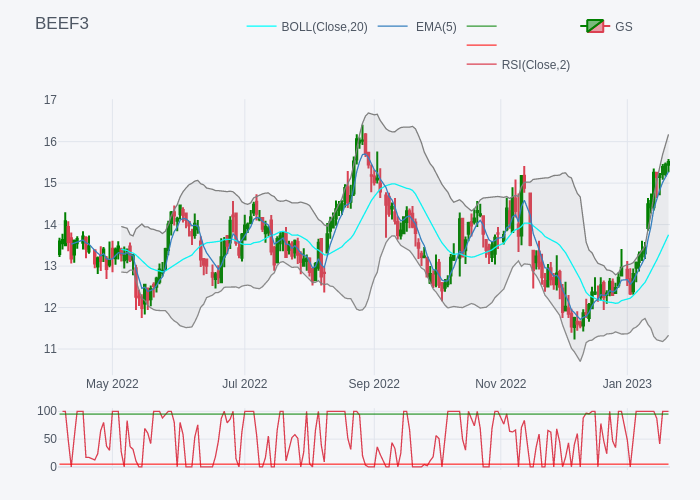

In [10]:
if len(ativo>200) :
  qf=cf.QuantFig(ativo[-200:],title=codigo,legend='top',name='GS',up_color='green', down_color='red' )
  qf.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True)
  qf.add_ema(periods=5)
  qf.add_rsi(periods=2,color='red',rsi_upper=95,rsi_lower=5,showbands=True)
  #qf.add_macd(fast_period=9,slow_period=21,signal_period=3)
  #qf.add_resistance(date='2022-11-11', on='close', color='orange')

  fig = qf.figure()
  fig.update_xaxes(
      rangebreaks=[dict(bounds=["sat", "mon"])])
  fig.show()

###simulação 

In [11]:
n_dias =         5#@param {type:"integer"} 
n_grafico = n_dias + 21
n_cenarios =    1000#@param {type:"integer"}

In [12]:
s_media     = (np.log(preco['Preço']/preco['Preço'].shift(1))).mean()
s_variancia = (np.log(preco['Preço']/preco['Preço'].shift(1))).var()
s_desvio_padrao = s_variancia**.5
## simula movimento browniano geométrico (MBG)
Z = stats.norm.ppf(np.random.rand(n_dias,n_cenarios))
retornos_diarios = np.exp((s_media - (0.5 * s_variancia)) + s_desvio_padrao * Z)
previsoes = np.zeros_like(a = np.arange(n_grafico*n_cenarios),dtype=float,shape=(n_grafico,n_cenarios))

for dia in range(n_grafico) :
  if dia < (n_grafico - n_dias) :
    previsoes[dia] = preco['Preço'].tail(n_grafico - n_dias).values[dia]
  else : 
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia - (n_grafico-n_dias)]

cenarios = pd.DataFrame()
for i in range(len(previsoes.T)):
  cenarios['cenario'+str(i)] = previsoes.T[i]


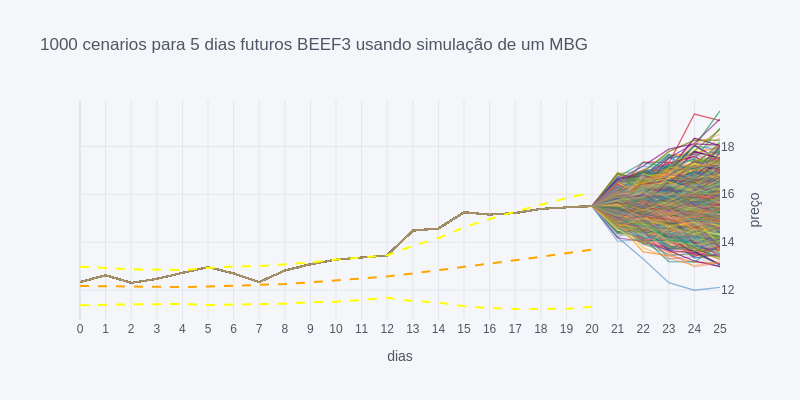

In [13]:
fig = cenarios.iplot(asFigure=True)

titulo = str(n_cenarios)+' cenarios para '+str(n_dias)+' dias futuros '+codigo+ ' usando simulação de um MBG'
layout = go.Layout(title=titulo,
                   yaxis={'title' : 'preço' , 'side' : 'right'},
                   xaxis={'title' : 'dias' , 'dtick' : 1 })


fig.update_layout(layout,showlegend=False,width=800,height=400)

fig.add_trace(go.Scatter(x=pd.Series(range(21)) ,  
                         y= preco['mm21'][-(n_grafico-n_dias):].values,
                         mode='lines', name='mm21',line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=pd.Series(range(21)) ,  
                         y= preco['mm21+2dp'][-(n_grafico-n_dias):].values,
                         mode='lines', name='upper BB',line=dict(color='yellow', dash='dash')))
fig.add_trace(go.Scatter(x=pd.Series(range(21)) ,  
                         y= preco['mm21-2dp'][-(n_grafico-n_dias):].values,
                         mode='lines', name='lower BB',line=dict(color='yellow', dash='dash')))


fig.show()

intervalo de confiança para o preço na primeira simulação

In [14]:
alpha=0.99

In [15]:
stats.t.interval(alpha=alpha, df=n_cenarios-1, 
                 loc=np.mean(previsoes[n_grafico - n_dias]), scale=stats.sem(previsoes[n_grafico - n_dias])) 
#stats.norm.interval(alpha=0.99, loc=np.mean(previsoes[n_grafico - n_dias]), scale=stats.sem(previsoes[n_grafico - n_dias])) 

(15.454355460114472, 15.531186046319652)

intervalo de confiança  para o preço na ultima simulação

In [16]:
stats.t.interval(alpha=alpha, df=n_cenarios-1, 
                 loc=np.mean(previsoes[-1]), scale=stats.sem(previsoes[-1])) 
#stats.norm.interval(alpha=0.99, loc=np.mean(previsoes[-1]), scale=stats.sem(previsoes[-1])) 

(15.439819171877799, 15.619109766735528)

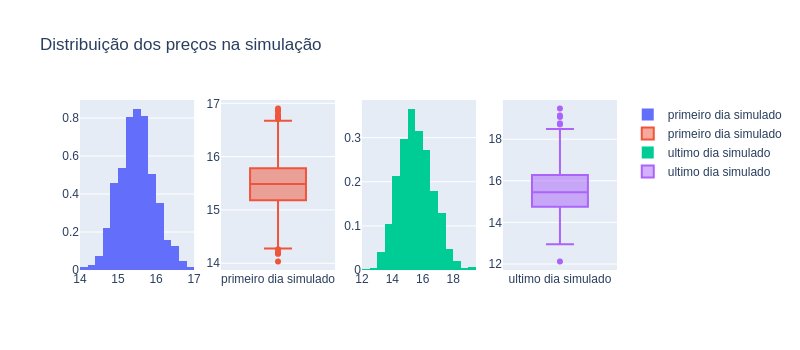

In [17]:
title='Distribuição dos preços na simulação'

from plotly.subplots import make_subplots

trace1 = go.Histogram(x=previsoes[n_grafico - n_dias] , nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='primeiro dia simulado')
trace3 = go.Histogram(x=previsoes[-1], nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='ultimo dia simulado')
trace2 = go.Box(y=previsoes[n_grafico - n_dias],name='primeiro dia simulado')
trace4 = go.Box(y=previsoes[-1],name='ultimo dia simulado')

fig = make_subplots(rows=1, cols=4)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig['layout'].update(height=350, width=800, title=title)

fig.show()

### cointegração

In [18]:
from statsmodels.tsa.stattools import coint, adfuller

In [19]:
def check_estacionaridade(X, cutoff=0.01):
    # H_0 é nao-estacionário, i.e., admite raiz unitaria (teste adfuller)
    
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' A serie "'+X.name+'" é, provavelmente, estacionaria.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' A serie "'+X.name+'" é, provavelmente, não-estacionaria.')
        return False

In [20]:
check_estacionaridade(preco['Preço'])

p-value = 0.45371261028328197 A serie "Preço" é, provavelmente, não-estacionaria.


False

p-value = 7.938024366052644e-22 A serie "Delta de Preço" é, provavelmente, estacionaria.


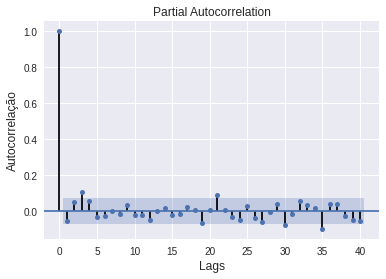

In [21]:
Delta_preco = preco['Preço'].diff()[1:]
Delta_preco.name =  'Delta de ' + preco['Preço'].name
if check_estacionaridade(Delta_preco) :
  from statsmodels.graphics.tsaplots import plot_pacf
  plt.rcParams['figure.figsize'] = [6,4]
  plot_pacf(Delta_preco, lags=40)
  plt.xlabel('Lags', fontsize=12)
  plt.ylabel('Autocorrelação', fontsize=12)
  plt.plot();

In [22]:
X=preco['Preço'].pct_change().dropna()
X.name='Retornos'
if check_estacionaridade(X) :
  print(codigo+' cointegra com ')

  if usar_periodo : 
    IBrA_preco = yf.download((pd.Series(IBrA)+'.SA').to_list(), period = periodo , progress = False)[qual_preco]
  else : 
    IBrA_preco = yf.download((pd.Series(IBrA)+'.SA').to_list(), start=inicio , end=termino , progress = False)[qual_preco]

  X = pd.Series(preco['Preço'][-250:]).values
  min_score=0.0
  cont=0
  for T in IBrA : 
      if T == codigo : # pula e passa pra próxima
        continue
      Y = pd.Series(IBrA_preco[T+'.SA'][-250:].dropna()).values
      """
      Test for no-cointegration. The null hypothesis is no cointegration. 
      Variables in y0 and y1 are assumed to be integrated of order 1, I(1).
      """
      if Y.shape == X.shape :  
        t,p,c = coint(X,Y)
        for pvalue in [0.01,0.05] : 
          if p < pvalue : 
            cont+=1
            print(T+' no nivel de confiança'+str((1-pvalue)*100)+"%", end=" - ")
            if pvalue == 0.01 : vc=c[0]
            elif pvalue == 0.05 : vc=c[1]
            else : vc=c[2]
            print('score='+str(t)+' para o valor crítico '+str(vc))
            if t < min_score : 
              min_score=t
              Min_score=T
            break


p-value = 2.2670375230690997e-22 A serie "Retornos" é, provavelmente, estacionaria.
BEEF3 cointegra com 
CMIG4 no nivel de confiança95.0% - score=-3.3458008665212846 para o valor crítico -3.360778600829019
ELET3 no nivel de confiança95.0% - score=-3.438628669014943 para o valor crítico -3.360778600829019
SUZB3 no nivel de confiança95.0% - score=-3.3527418165213096 para o valor crítico -3.360778600829019


In [23]:
slope,intercept, r, pvalue, stderr = stats.linregress(y=IBrA_preco[Min_score+'.SA'][-250:],x=X)
residuos =  IBrA_preco[Min_score+'.SA'][-250:] - slope * X

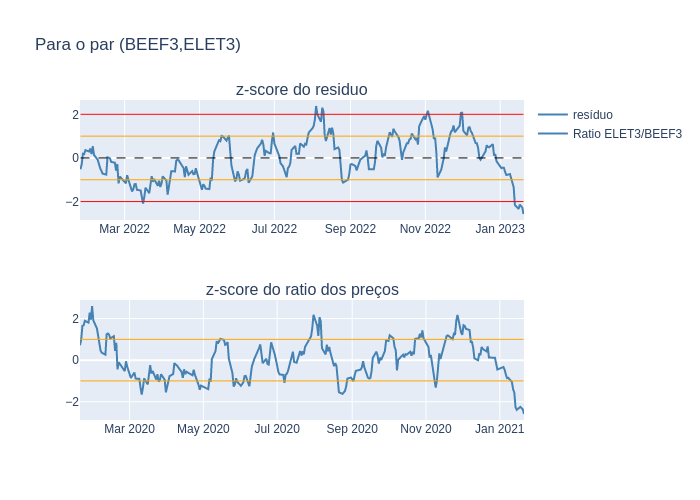

In [24]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

trace1 = go.Scatter( x = residuos.index,  y = zscore(residuos) , 
                    name = 'resíduo',
                    line=dict(color='steelblue'))

trace2 = go.Scatter( x = IBrA_preco.index,  y = zscore(IBrA_preco[Min_score+'.SA'][-250:]/X) , 
                    name = 'Ratio '+Min_score+'/'+codigo,
                    line=dict(color='steelblue'))

fig = make_subplots(rows=2, cols=1,subplot_titles=(['z-score do residuo','z-score do ratio dos preços']))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(shapes=[{'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':2,'y1': 2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':-2,'y1': -2,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':0,'y1': 0,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y1','line': {'color': 'black','width': 1,'dash':'dash'}},
                             {'type': 'line','y0':1,'y1': 1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(residuos.index),'x1':max(residuos.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}}
                             ],title='Para o par ('+codigo+','+Min_score+')')
fig.show()

##Drawdown máximo no período


In [25]:
def get_max_drawdown(price):
  data = pd.DataFrame(price)
  column = price.name
  data['max'] = data[column].cummax()
  data['delta'] = data['max'] - data[column]
  data['dd'] = 100 * (data['delta'] / data['max'])
  maxdrawdown = data['dd'].max()
  bottom_day = data['dd'].idxmax()
  bottom_index = data[['dd']].index.get_loc(bottom_day)
  max_value = data.iloc[bottom_index]['max']
  top_day = (data['max'] == max_value).idxmax()
  top_index = data[['max']].index.get_loc(top_day)
  return maxdrawdown, bottom_day, bottom_index, top_day, top_index

In [26]:
dd, bday, bindex, tday, tindex = get_max_drawdown(preco['Preço'])
print('max drawdown ', round(dd,2),'% de ', tday.strftime('%d/%m/%Y') , ' até ' , bday.strftime('%d/%m/%Y') )

max drawdown  56.64 % de  21/01/2020  até  18/03/2020


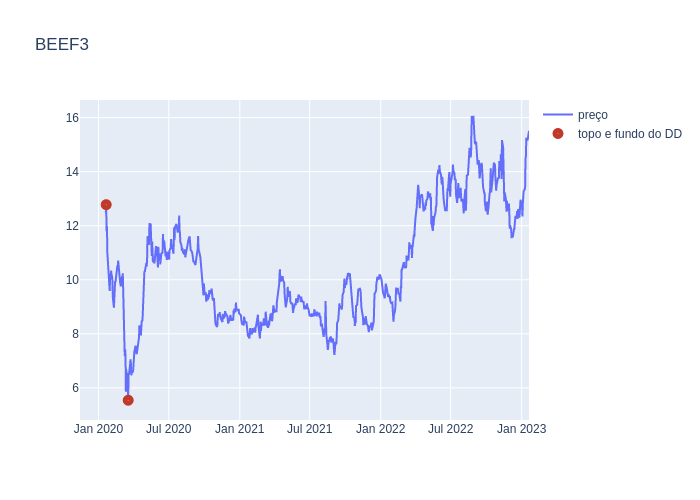

In [27]:
trace1 = go.Scatter(x = preco.index, y = preco['Preço'], mode = 'lines' , name = 'preço' )
trace2 = go.Scatter(x = [preco.index[bindex],preco.index[tindex]],
                    y = [preco['Preço'].iloc[bindex] , preco['Preço'].iloc[tindex]],
                   mode = 'markers', name = 'topo e fundo do DD',
                   marker =  {'color' : 'orange',
                              'line' : {'width': 5,
                                        'color': '#c0392b'}} )
layout =  dict( title = codigo,
 #   height = 772,
  #  width = 950,
  #  font = dict(
  #    size = 10
  #  ),    
)

data_trace = [trace1,trace2]

fig=go.Figure(data=data_trace , layout=layout)
fig.show()

In [28]:
#@title #### Drawdowns por ano 
years = [*range(datetime.strptime(inicio, "%Y-%m-%d").year , datetime.strptime(termino, "%Y-%m-%d").year + 1)]
DDM = pd.DataFrame(columns=[codigo , 'Ibov'],index=years)#, codigo , 'Ibov'])

In [29]:
i=0
yearly_data=pd.DataFrame()
for year in years :
  yearly_data = preco[preco.index.year == year].copy()

  if len(yearly_data.index)>0 :
      yearly_dd1,_,_,_,_ = get_max_drawdown(yearly_data['Preço'])
      yearly_dd2,_,_,_,_ = get_max_drawdown(yearly_data['ibov'])
      DDM.loc[year] = [round(yearly_dd1,2), round(yearly_dd2,2)]
  i=i+1

Drawdowns máximos por ano:


,BEEF3,Ibov
2020,56.64,46.82
2021,30.45,22.94
2022,28.14,20.93


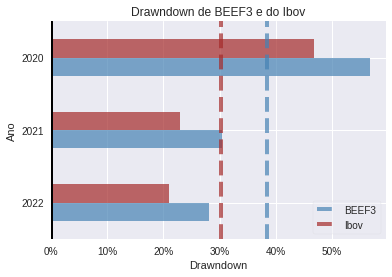

In [30]:
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    """
    Adds percentage sign to plot ticks.
    """

    return '%.0f%%' % x

ax = plt.gca()

x_axis_formatter = FuncFormatter(percentage)
ax.xaxis.set_major_formatter(FuncFormatter(x_axis_formatter))
ax.tick_params(axis='x', which='major')

ax.axvline(DDM[codigo].values.mean(),color='steelblue',linestyle='--',lw=4,alpha=0.7);
ax.axvline(DDM['Ibov'].values.mean(), color='brown',  linestyle='--',lw=4,alpha=0.7);
(DDM.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= ['steelblue','brown']);
ax.axvline(0.0, color='black', linestyle='-', lw=3);

ax.set_ylabel('Ano');
ax.set_xlabel('Drawndown');
ax.set_title("Drawndown de "+codigo+" e do Ibov");
ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

print('Drawdowns máximos por ano:')

DDM

# Retornos


In [31]:
preco['retorno'] = preco['Preço'].pct_change()
preco['log_retorno'] = np.log(preco['Preço']) - np.log(preco['Preço'].shift(1))
ibov['Preço'] = ibov[qual_preco]
ibov['retorno'] = ibov['Preço'].pct_change()
ibov['log_retorno'] = np.log(ibov['Preço']) - np.log(ibov['Preço'].shift(1))

In [32]:
retornos = pd.merge(ibov['retorno'], preco['retorno'],
                    left_index=True, right_index=True, how='inner')
retornos = retornos.rename(columns={ibov['retorno'].name+'_x':'r_ibov' , preco['retorno'].name+'_y':'r_'+codigo})
retornos['lr_ibov'] = ibov['log_retorno']
retornos['lr_'+codigo] = preco['log_retorno'] 
retornos.dropna(inplace=True)

print(retornos.shape)
retornos.head(2)

(747, 4)


,r_ibov,r_BEEF3,lr_ibov,lr_BEEF3
Date,,,,
2020-01-21 00:00:00-03:00,-0.015446,0.023537,-0.015567,0.023265
2020-01-22 00:00:00-03:00,0.011664,-0.076873,0.011597,-0.079988


In [33]:
##semanal
weekly_returns = pd.DataFrame()
weekly_returns[codigo] = preco['Preço'].resample('W').ffill()
weekly_returns['retorno'] =  weekly_returns[codigo].pct_change()
weekly_returns.dropna(inplace=True)

##mensal
monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill()
monthly_returns['retorno'] = monthly_returns[codigo].pct_change()
monthly_returns.dropna(inplace=True)

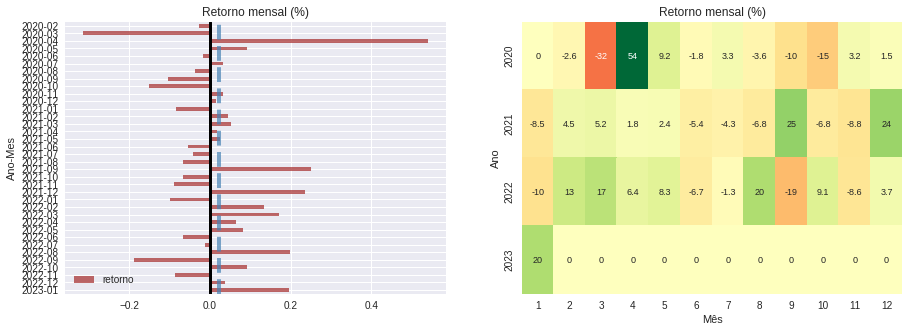

In [34]:
fig = plt.figure(1)
plt.subplot(1,2,1)
ax = plt.gca()

mr = pd.DataFrame(data=monthly_returns['retorno'])
mr.index = mr.index.to_period(freq='M')

ax.axvline(mr.values.mean(), color='steelblue',  linestyle='--',lw=4,alpha=0.7);
(mr.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= 'brown');
ax.axvline(0.0, color='black', linestyle='-', lw=3);
ax.set_ylabel('Ano-Mes')
ax.set_title("Retorno mensal (%)")

#ax.set_ylabel('Ano');
#ax.set_xlabel('Drawndown');
#ax.set_title("Drawndown de "+codigo+" e do Ibov");
#ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

plt.subplot(1,2,2)
ax = plt.gca()

returns_table = monthly_returns.pivot_table(values='retorno', 
                               index=monthly_returns.index.year, 
                               columns=monthly_returns.index.month, 
                               aggfunc='mean')

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax)
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(15,5)
plt.show()

### normalidade na distribuição dos retornos

In [35]:
r_media = retornos['r_'+codigo].mean() 
r_variancia = retornos['r_'+codigo].var()
r_desviopadrao = retornos['r_'+codigo].std()

jb_test = stats.jarque_bera(retornos['r_'+codigo].values)
print(f'teste Jarque-Bera: {jb_test[0]:.2f} com p-valor: {jb_test[1]:.2f}')
r_range = np.linspace(min(retornos['r_'+codigo]), max(retornos['r_'+codigo]), num=1000)
norm_pdf = stats.norm.pdf(r_range, loc=r_media , scale=r_desviopadrao)

teste Jarque-Bera: 1451.84 com p-valor: 0.00


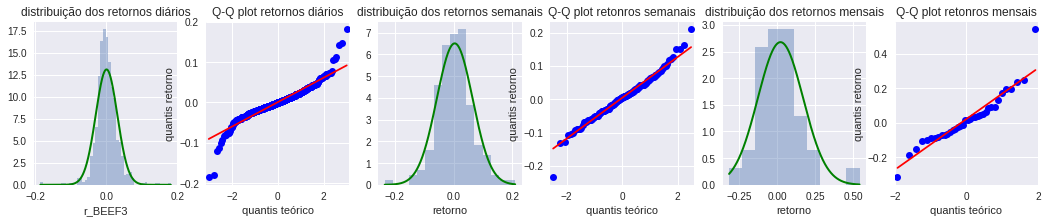

In [36]:
r_fig, ax = plt.subplots(1, 6 , figsize=(18,3))

r_range = np.linspace(min( retornos['r_'+codigo]), max( retornos['r_'+codigo]), num=1000)
# histograma diário
sns.distplot( retornos['r_'+codigo], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('distribuição dos retornos diários')#, fontsize=12)
ax[0].plot(r_range, stats.norm.pdf(r_range, loc=r_media, scale=r_desviopadrao) ,#
           'g', lw=2,label=f'N({r_media:.2f}, {r_variancia:.4f})')
# Q-Q plot diário
qq1 = sm.qqplot( retornos['r_'+codigo].values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot retornos diários')#, fontsize = 12)
ax[1].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

##semanal
r_range = np.linspace(min(weekly_returns['retorno']), max(weekly_returns['retorno']), num=1000)
w_m = weekly_returns['retorno'].mean() 
w_s = weekly_returns['retorno'].std()

# histograma semanal
sns.distplot(weekly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[2])
ax[2].set_title('distribuição dos retornos semanais')#, fontsize=12)
ax[2].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot semanal
qq2 = sm.qqplot(weekly_returns['retorno'].values, line='s', ax=ax[3])
ax[3].set_title('Q-Q plot retonros semanais')#, fontsize = 12)
ax[3].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')


##mensal
r_range = np.linspace(min(monthly_returns['retorno']), max(monthly_returns['retorno']), num=1000)
w_m = monthly_returns['retorno'].mean() 
w_s = monthly_returns['retorno'].std()

# histograma mensal
sns.distplot(monthly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[4])
ax[4].set_title('distribuição dos retornos mensais')#, fontsize=12)
ax[4].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot mensal
qq2 = sm.qqplot(monthly_returns['retorno'].values, line='s', ax=ax[5])
ax[5].set_title('Q-Q plot retonros mensais')#, fontsize = 12)
ax[5].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

fig.tight_layout() 
fig.show()

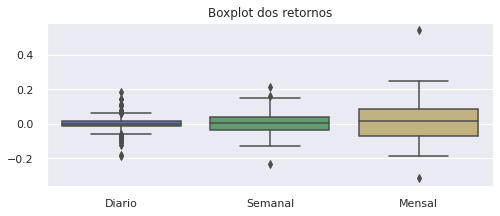

In [37]:
sns.set(rc={'figure.figsize':(8,3)})
sns.axes_style(style='darkgrid' ) 
ax = plt.gca()
ax.set_title('Boxplot dos retornos')  
sns.boxplot(data=[retornos['r_'+codigo], weekly_returns['retorno'], monthly_returns['retorno']], 
                palette=["#4c72B0", "#55A868", "#CCB974"], ax=ax)
ax.set_xticklabels(['Diario', 'Semanal', 'Mensal']);

comparação com ibov

In [38]:
print('-- Estatísticas do retorno diário')
tmp = [['Intervalo de datas' , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date)) , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date))],
       ['no. de observações' , retornos['r_'+codigo].shape[0] , retornos['r_ibov'].shape[0]],
       ['min', str(round( retornos['r_'+codigo].min()*100,3))+'%', str(round( retornos['r_ibov'].min()*100,3))+'%'],
       ['max', str(round( retornos['r_'+codigo].max()*100,3))+'%', str(round( retornos['r_ibov'].max()*100,3))+'%'],
       ['média', str(round( retornos['r_'+codigo].mean()*100,3))+'%', str(round( retornos['r_ibov'].mean()*100,3))+'%'],
       ['mediana', str(round( retornos['r_'+codigo].median()*100,3))+'%', str(round( retornos['r_ibov'].median()*100,3))+'%'],
       ['desvio padrão', str(round( retornos['r_'+codigo].std()*100,3))+'%', str(round( retornos['r_ibov'].std()*100,3))+'%'],
       ['assimetria', round( retornos['r_'+codigo].skew(),3), round( retornos['r_ibov'].skew(),3)],
       ['curtose', round( retornos['r_'+codigo].kurtosis(),3), round( retornos['r_ibov'].kurtosis(),3)],  
       ['retorno anualizado',str(round( retornos['r_'+codigo].mean()*252*100,2))+'%' , str(round( retornos['r_ibov'].mean()*252*100,2))+'%'],   
       ['dp anualizado',str(round( retornos['r_'+codigo].std()*np.sqrt(252)*100,2))+'%' , str(round( retornos['r_ibov'].std()*np.sqrt(252)*100,2))+'%'],
      ]       
vol = pd.DataFrame(tmp , columns=['tmp' , 'r_'+codigo , 'r_ibov'], index=[i[0] for i in tmp])
vol.drop('tmp',axis=1, inplace=True)
data_table.DataTable(vol , include_index=True ,num_rows_per_page=15)

-- Estatísticas do retorno diário


,r_BEEF3,r_ibov
Intervalo de datas,2020-01-21 ~ 2023-01-20,2020-01-21 ~ 2023-01-20
no. de observações,747,747
min,-18.575%,-14.78%
max,18.182%,13.908%
média,0.075%,0.012%
mediana,-0.085%,0.052%
desvio padrão,3.041%,1.953%
assimetria,-0.02,-0.986
curtose,6.884,14.859
retorno anualizado,19.0%,2.96%


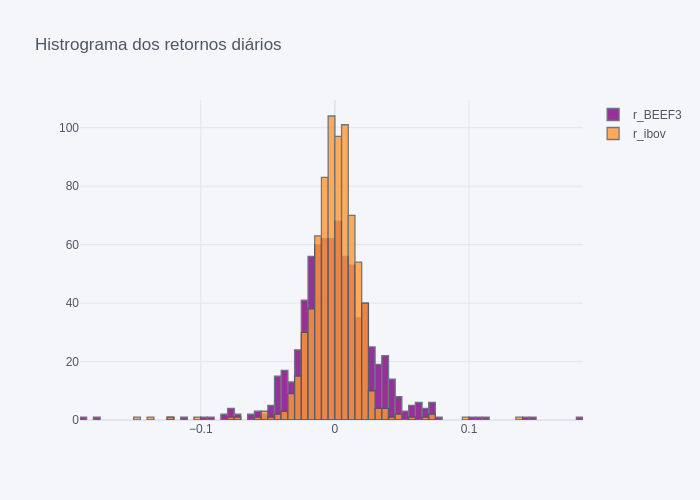

In [39]:
#@markdown histogramas dos retornos diários

retornos.iplot(kind='histogram',
                  #subplots=True,
                  keys = ['r_'+codigo,'r_ibov'],
                  colors=['orange','purple'],
                  title='Histrograma dos retornos diários',
                  #theme="henanigans"
                  )

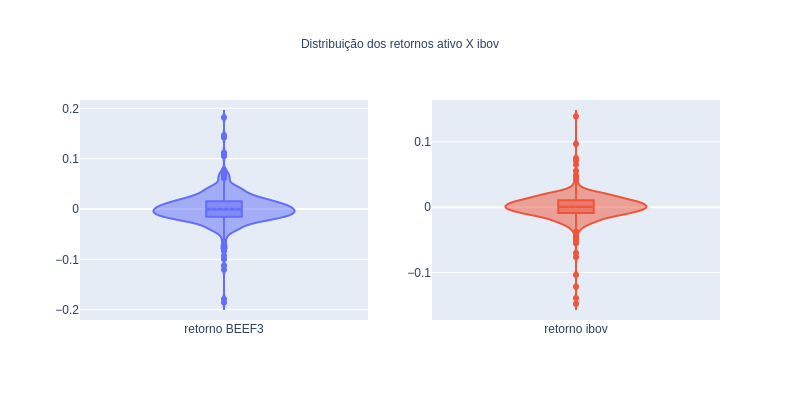

In [40]:
title = "Distribuição dos retornos ativo X ibov"

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_'+codigo].values, name='retorno '+codigo)
    ,row=1, col=1)
fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_ibov'], name='retorno ibov')
    ,row=1, col=2)
fig.update_layout(title_font_size=12 , width=800 , height=400 , showlegend=False,
               title={'text': title,'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},   ) 

fig.show()

In [41]:
stats.t.interval(alpha=0.98, df=len(retornos)-1,
              loc= retornos['r_ibov'].mean(),
              scale=stats.sem(retornos['r_ibov']))

(-0.0015485122972749028, 0.0017836320258886812)

In [42]:
ipca = quandl.get('BCB/13522', start_date = min(retornos.index.date))
ipca.rename(columns={'Value': 'ipca'}, inplace=True)
cdi=quandl.get('BCB/12', start_date = min(retornos.index.date))
cdi.rename(columns={'Value': 'cdi'}, inplace=True)

In [43]:
cdi.index=cdi.index.tz_localize(tz='America/Sao_Paulo')
ipca.index=ipca.index.tz_localize(tz='America/Sao_Paulo')

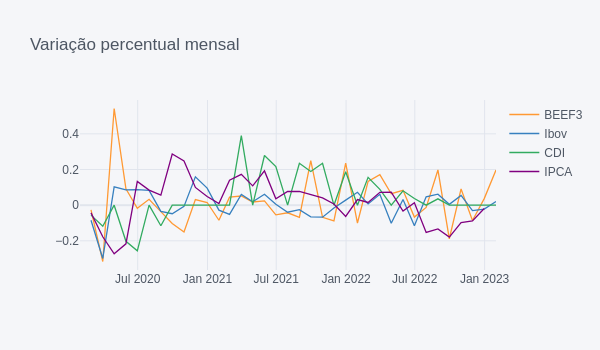

In [44]:
# @ markdown gráficos dos retornos mensais 

monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill().pct_change()
monthly_returns['Ibov'] = ibov['Preço'].resample('M').ffill().pct_change()
monthly_returns['CDI']  = cdi['cdi'].resample('M').ffill().pct_change()
monthly_returns['IPCA'] = ipca['ipca'].pct_change()

trace2 = (monthly_returns).iplot(title= 'Variação percentual mensal',dimensions=(600,350))

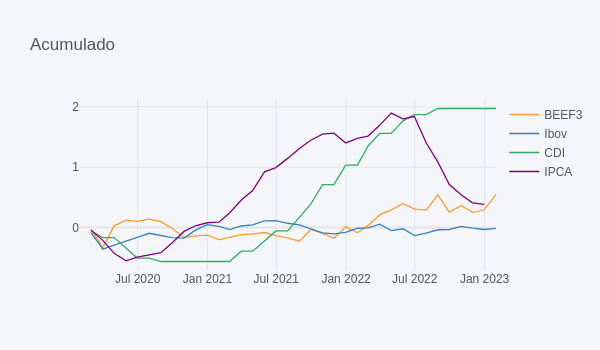

In [45]:
cum_returns = (monthly_returns + 1).cumprod() - 1
trace3 = cum_returns.iplot(title= 'Acumulado',dimensions=(600,350))

### correlação dos retornos com ativos do índice amplo

In [46]:
IBrA_rtrns = pd.DataFrame()
if codigo in IBrA : IBrA_rtrns = IBrA_preco.pct_change()  
else :
  IBrA_rtrns = (IBrA_preco.pct_change()).join(retornos['r_'+codigo],how='inner')
  IBrA_rtrns.rename(columns={'r_'+codigo : codigo+'.SA'}, inplace=True)
IBrA_rtrns.dropna(inplace=True)
#m=IBrA_rtrns.corr()

In [47]:
data_corr = pd.DataFrame(IBrA_rtrns.corr().loc[codigo+'.SA'])

(no colab) clique na figura


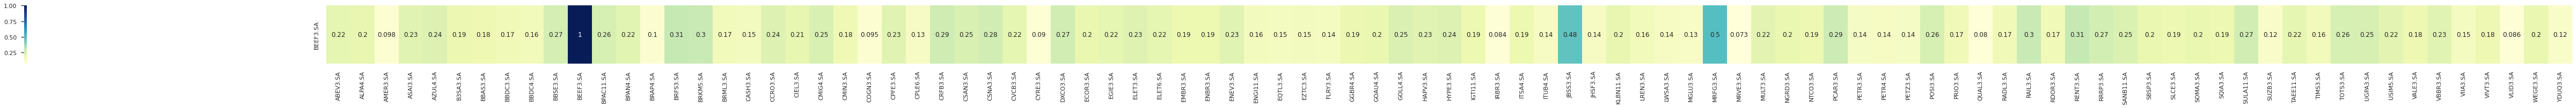

In [48]:
sns.set(rc = {'figure.figsize':(100,2)})
sns.heatmap(data_corr.T, annot = True, cmap = 'YlGnBu' , cbar_kws = dict(use_gridspec = False, location = "left"))
print('(no colab) clique na figura')

### retorno esperado pelo CAPM 



In [49]:
## o join garante a coincidencia da datas
capm_data = ((cdi.join(retornos['r_'+codigo])).join(retornos['r_ibov'])).dropna()
capm_data.head(2)

,cdi,r_BEEF3,r_ibov
Date,,,
2020-01-21 00:00:00-03:00,0.017089,0.023537,-0.015446
2020-01-22 00:00:00-03:00,0.017089,-0.076873,0.011664


In [50]:
X = capm_data['r_ibov'] - capm_data['cdi']     # excesso retorno ativo
y = capm_data['r_'+codigo] - capm_data['cdi']  # excesso retorno indice 
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
_, beta = result.params

expected_return = capm_data['cdi'].mean() + beta*X.mean()
print("Retorno diário esperado: " + str(expected_return))
monthly_return = expected_return * 21
print("Retorno mensal esperado: " + str(monthly_return))
yearly_return = monthly_return * 12
print("Retorno anual esperado : " + str(yearly_return))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     391.9
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           2.13e-70
Time:                        12:38:19   Log-Likelihood:                 1615.6
No. Observations:                 746   AIC:                            -3227.
Df Residuals:                     744   BIC:                            -3218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.001     -3.609      0.0

### hedge

A correlação entre os retornos é 0.42


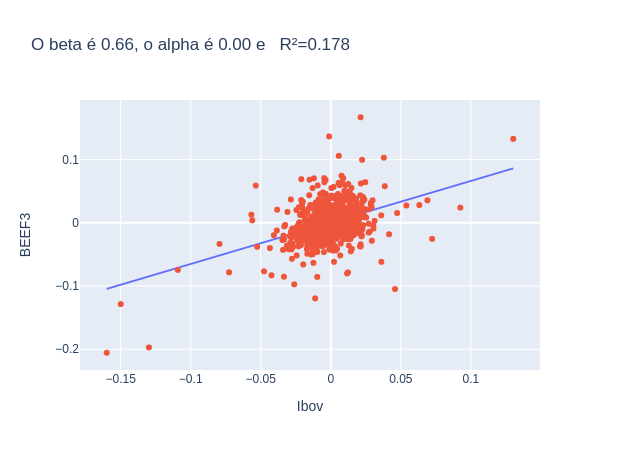

In [51]:
slope,intercept, r, pvalue, stderr = stats.linregress(x=retornos['r_ibov'], y=retornos['r_'+codigo])

print(f'A correlação entre os retornos é {r:.2f}')

line_x = np.linspace(retornos['lr_ibov'].min(), retornos['lr_ibov'].max(),100)
line_y = slope*line_x + intercept
trace1 = go.Scatter(x = line_x,y = line_y, mode = 'lines' )

trace2 = go.Scatter(x = retornos['lr_ibov'], y=retornos['lr_'+codigo] , mode ='markers')                   
                
layout = dict(title = f'O beta é {slope:.2f}, o alpha é {intercept:.2f} e   R²={r**2:.3f}',
              xaxis_title="Ibov",
              yaxis_title=codigo,
              height = 450,width = 620,
              showlegend=False,
              font = dict(size = 12),    )

data_trace = [trace1,trace2]
ply.iplot(go.Figure(data=data_trace , layout=layout))

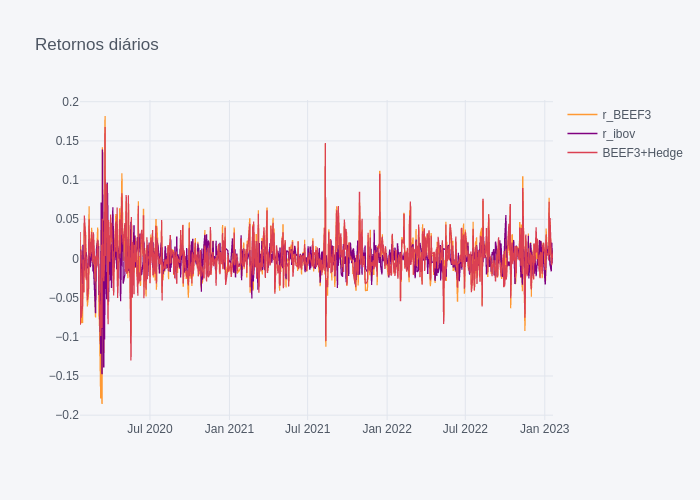

In [52]:
# beta hedge
""" 
Portfolio managers design factor models that tell them how to balance a portfolio to earn alpha. 
Because alpha is how managers get paid, they only want exposure to their factors. 
Beta hedging removes the part of returns driven by the market and leaves only the returns driven by the factors.
"""


retornos[codigo+"+Hedge"] = -1 * slope * retornos['r_ibov']+ retornos['r_'+codigo]
retornos.iplot(   keys = ['r_'+codigo,'r_ibov',codigo+"+Hedge"],
                  colors=['orange','purple', 'red'],
                  title='Retornos diários' )


In [53]:
P = retornos[codigo+"+Hedge"].values
X = retornos['r_ibov'].values
alpha,beta,_,_,_ = stats.linregress(X, P)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: 4.251527178121529e-16
Beta: 0.0006768038970696205


#Volatilidade

##Volatilidade Condicional

Garch(1,1): a variância condicional é $\sigma_n^2 = \omega + \alpha r_{n-1}^2 + \beta\sigma_{n-1}^2 $, as letras gregas são parâmetros estimados (por máx. verossimilhamça) do modelo, $r$ é retorno e $\sigma^2$ variância.  Os parâmetros:  $\omega = (1-\alpha-\beta)\cdot(\text{var de longo prazo})$, que é uma "reversão a média": $\sigma_{\infty}^2\to \text{VLP}$ com velocidade $1-\alpha-\beta$; $\alpha$ é o peso dos retornos  mais recentes, desde que $\alpha,\beta,\omega\geq 0$ e $\alpha+\beta<1$; $\beta$ é velocidade do  decaimento para as volatilidades mais recentes. 

Quando $\omega=0,\alpha=1-\lambda, \beta=\lambda$ é o ewma: $ (1-\lambda) r_{n-1}^2 + \lambda \sigma_{n-1}^2$


In [54]:
#@title ####   EWMA
#@markdown fator de decaimento para ewma:
Lambda=0.94 #@param {type:"number"}


In [55]:
ewma = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
ewma['vol'].iloc[0] = np.sqrt((retornos['r_'+codigo][0:4]**2).sum())
for t in range(1,len(retornos['r_'+codigo])):
    ewma.iloc[t] = np.sqrt((1-Lambda)*retornos['r_'+codigo].iloc[t-1]**2 + Lambda*ewma.iloc[t-1]**2)
ewma.tail(3)

,vol
Date,
2023-01-18 00:00:00-03:00,0.028376
2023-01-19 00:00:00-03:00,0.027647
2023-01-20 00:00:00-03:00,0.026822


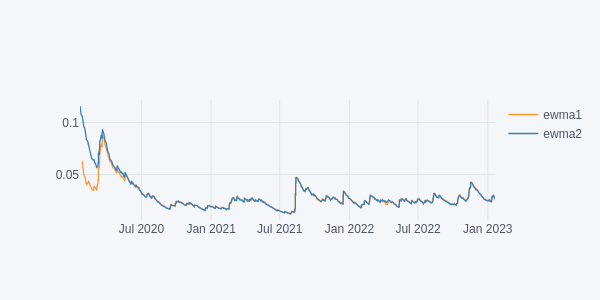

In [56]:
######### 
tmp=pd.DataFrame()
tmp['ewma1'] = (retornos['r_'+codigo].ewm(alpha = 0.06, min_periods=4, adjust=False).std()).shift(1)
tmp['ewma2'] = ewma['vol']
tmp.iplot(dimensions=(600,300))
##########

In [57]:
#@title ####   GARCH(1,1)

!pip install -q arch
import scipy.optimize as spop

def garch_mle(params):
    mu    = params[0]
    omega = params[1]
    alpha = params[2]
    beta  = params[3]
    #variancia de longo prazo
    long_var =  (omega/(1 - alpha - beta))
    #volatilidade de longo prazo 
    long_run = np.sqrt(long_var*252)
    #volatilidade condicional
    resid = retornos['r_'+codigo] - mu
    realised = abs(resid)
    conditional = np.zeros(len(retornos['r_'+codigo]))
    conditional[0] =  long_run
    # GARCH
    for t in range(1,len(retornos['r_'+codigo])):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    # np.log-verossimilhança
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    np.log_likelihood = np.sum(np.log(likelihood))
    return -np.log_likelihood
### grach parametros
# maximização  np.log-verossimilhança 
res = spop.minimize(garch_mle , [r_media, r_variancia, 0, 0  ], method='Nelder-Mead')
    
params = res.x
G_mu     = res.x[0]
G_omega  = res.x[1]
G_alpha  = res.x[2]
G_beta   = res.x[3]
np.log_likelihood = -float(res.fun)
#print('np.log-verossim. '+str(round(np.log_likelihood, 4)))
###############################

print('Parâmetros do GARCH encontrados:')
print('mu '+str(round(G_mu, 6)))
print('omega '+str(round(G_omega, 6)))
print('alpha '+str(round(G_alpha, 6)))
print('beta  '+str(round(G_beta, 6)))


Parâmetros do GARCH encontrados:
mu 0.001175
omega 0.000171
alpha 0.203283
beta  0.581654


In [58]:
long_run = (G_omega/(1 - G_alpha - G_beta))**(1/2)
G_resid = retornos['r_'+codigo] - G_mu

conditional = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
conditional['vol'].iloc[0] = long_run
for t in range(1,len(retornos['r_'+codigo])):
    conditional['vol'].iloc[t] = (G_omega + G_alpha*G_resid.iloc[t-1]**2 + G_beta*conditional.iloc[t-1]**2)**(1/2)
conditional.tail(3)

,vol
Date,
2023-01-18 00:00:00-03:00,0.026501
2023-01-19 00:00:00-03:00,0.024492
2023-01-20 00:00:00-03:00,0.022835


In [59]:
print('VOLATILIDADE:')
print('volatilidade diária de longo prazo '+str(round(long_run, 6)*100)+'%')
print('volatilidade de longo prazo anualizada '+str(round(long_run*np.sqrt(252), 6)*100)+'%')
print(' ')

VOLATILIDADE:
volatilidade diária de longo prazo 2.8201%
volatilidade de longo prazo anualizada 44.767%
 


In [60]:
from arch import arch_model
model = arch_model(retornos['r_'+codigo], mean='constant',vol='GARCH', p=1, q=1,dist='normal')
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                r_BEEF3   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1631.12
Distribution:                  Normal   AIC:                          -3254.23
Method:            Maximum Likelihood   BIC:                          -3235.77
                                        No. Observations:                  747
Date:                Sat, Jan 21 2023   Df Residuals:                      746
Time:                        12:38:28   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.5036e-04  9.646e-04      0.985      0.324 

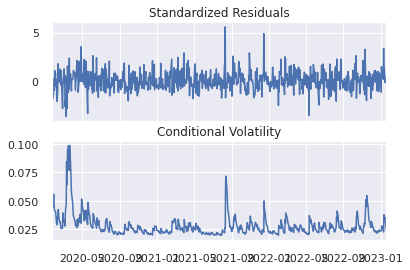

In [61]:
%matplotlib inline
model_fitted.plot();

In [62]:
model_forecast = model_fitted.forecast(horizon=5)

In [63]:
model_forecast.variance[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-01-20 00:00:00-03:00,0.000538,0.000574,0.000607,0.000635,0.00066


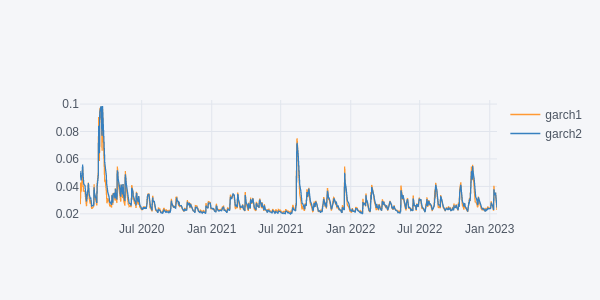

In [64]:
######### 
tmp=pd.DataFrame()
tmp['garch1'] = conditional['vol']
tmp['garch2'] = model_fitted.conditional_volatility
tmp.iplot(dimensions=(600,300))
##########

In [65]:
vols = pd.DataFrame(columns=['ewma' , 'dp' , 'garch(1,1)' , 'longo prazo' , 'g-model'] , index = retornos.index)
vols['ewma'] = ewma['vol']
vols['dp'] = r_desviopadrao
vols['garch(1,1)'] = conditional['vol']
vols['longo prazo'] = long_run
vols['g-model']=model_fitted.conditional_volatility

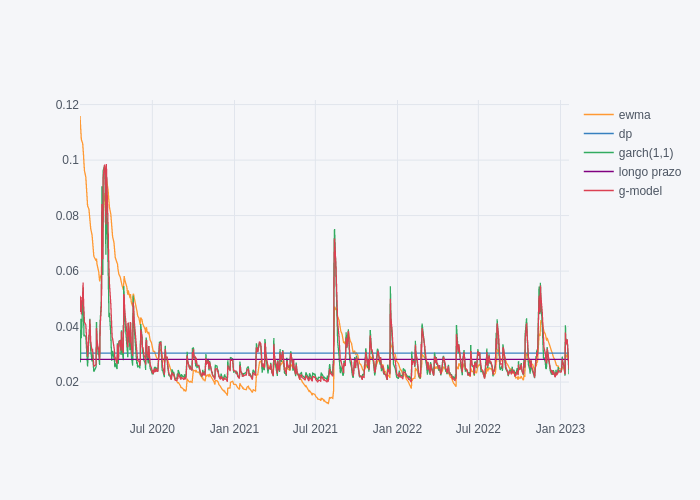

In [66]:
vols.iplot()

In [67]:
vols.round(decimals=3).iloc[::-1].head(3)

,ewma,dp,"garch(1,1)",longo prazo,g-model
Date,,,,,
2023-01-20 00:00:00-03:00,0.027,0.03,0.023,0.028,0.025
2023-01-19 00:00:00-03:00,0.028,0.03,0.024,0.028,0.027
2023-01-18 00:00:00-03:00,0.028,0.03,0.027,0.028,0.029


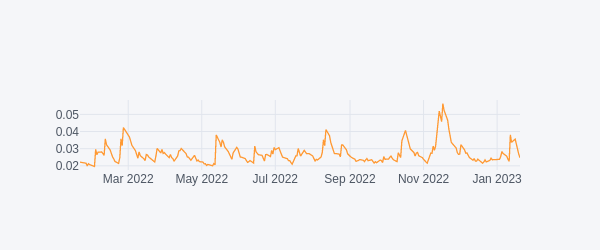

In [68]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = retornos['r_'+codigo][:-(test_size-i)]
    model = arch_model(train, mean='constant',vol='GARCH', p=1, q=1,dist='normal')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=retornos['r_'+codigo].index[-test_size:])
rolling_predictions.iplot(dimensions=(600,250))

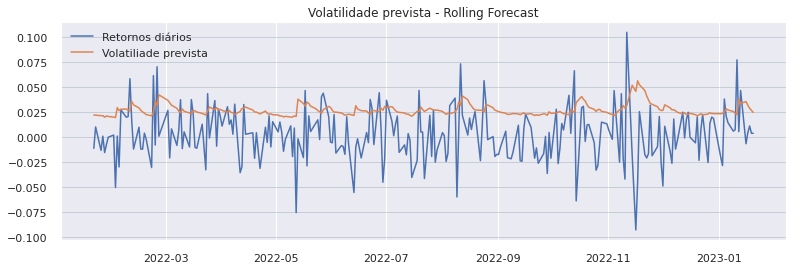

In [69]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
#ax.spines[['top','right']].set_visible(False)
plt.plot(retornos['r_'+codigo][-test_size:])
plt.plot(rolling_predictions)
plt.title('Volatilidade prevista - Rolling Forecast')
plt.legend(['Retornos diários', 'Volatiliade prevista'])


## Preço das opções por BS
Preço da Call $ = SN(d_1) - K e^{-rt}N(d_2)$ e 

Preço da Put $ = Ke^{-rt}N(-d_2)-SN(-d_1)$

$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})t}{\sigma \cdot \sqrt{t}}$
e $d_2 = d_1 - \sigma \cdot \sqrt{t}$

S = Preço atual da ação; K = Preço de Strike; r = Taxa livre de risco (com capitalização composta); 
σ =Variância (anual) do retorno contínuo da ação; t = Prazo (em anos) até a data de vencimento;
N(d) = Probabilidade de que uma variável aleatória padronizada e com distribuição normal, seja menor ou igual a d


In [70]:
def call_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*stats.norm.cdf(d1)-E*np.exp(-rf*T)*stats.norm.cdf(d2)


def put_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S*stats.norm.cdf(-d1)+E*np.exp(-rf*T)*stats.norm.cdf(-d2)


In [71]:
#data
vencimento = "2023-02-17"    #@param {type:"date"}
venc= datetime.strptime(vencimento, '%Y-%m-%d')

hoje= preco.index[-1]
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
# taxa livre risco
selic = quandl.get('BCB/432', start_date = inicio)
r =  np.log((selic.iloc[-1]/100).values[0]+1)
# preço
S = preco['Preço'].iloc[-1]      
# volatilidade
sigma = vols['dp'].iloc[-1]*np.sqrt(252)
sigma = vols['g-model'].iloc[-1]*np.sqrt(252)


preços teóricos para 'vencimento'

In [72]:
# strikes

mm = (preco['Preço'][-21:-1].dropna()).mean()  #preço médio
ss = (preco['Preço'][-21:-1].dropna()).std()   #dp do preço
Ss= mm-3*ss
Sa= mm-2*ss
Sb= mm-1*ss
Sc= mm+1*ss 
Sd= mm+2*ss
Se= mm+3*ss



bs_data = [
    [ '{:0.2f}'.format(Ss) , round(call_option_price(S,Ss, t, r, sigma),2)  ,round(put_option_price(S,Ss, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sa) , round(call_option_price(S,Sa, t, r, sigma),2)  ,round(put_option_price(S,Sa, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sb) , round(call_option_price(S,Sb, t, r, sigma),2)  ,round(put_option_price(S,Sb, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(mm) , round(call_option_price(S,mm, t, r, sigma),2)  ,round(put_option_price(S,mm, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(S)  , round(call_option_price(S,S , t, r, sigma),2)  ,round(put_option_price(S ,S, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sc) , round(call_option_price(S,Sc, t, r, sigma),2)  ,round(put_option_price(S,Sc, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sd) , round(call_option_price(S,Sd, t, r, sigma),2)  ,round(put_option_price(S,Sd, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Se) , round(call_option_price(S,Se, t, r, sigma),2)  ,round(put_option_price(S,Se, t, r, sigma),2) ] 
]


BS = pd.DataFrame(bs_data , columns=['preço '+codigo, 'preço Call' , 'preço Put'] )
BS.style.hide_index()

preço BEEF3,preço Call,preço Put
10.07,5.550000,0.000000
11.24,4.380000,0.000000
12.42,3.230000,0.010000
13.60,2.130000,0.070000
15.51,0.760000,0.600000
14.77,1.200000,0.310000
15.95,0.560000,0.840000
17.13,0.210000,1.650000


In [73]:
#@markdown preço teórico a partir de outros parâmetros
#@markdown usando BS e Monte Carlo

# preço
S=15.51 #@param {type:"number"}
print('preço  do ativo',S)

# data
vencimento = "2023-02-17"    #@param {type:"date"}
hoje= preco.index[-1]
venc= datetime.strptime(vencimento, '%Y-%m-%d')
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
print("vencimento em "+str(res)+" dias (",t,"anos)")

# strike
strike=15.00  #@param {type:"number"}

# selic
juros = 13.75 #@param {type:"number"}
r=np.log(juros/100+1)
# vol
volatilidade ='GARCH'  #@param ['GARCH' , 'EWMA' ,'Desvio Padrao' ]

if volatilidade == 'GARCH'  : 
	sigma = vols['g-model'].iloc[-1]*np.sqrt(252)
elif volatilidade == 'EWMA' : 
	sigma = vols['ewma'].iloc[-1]*np.sqrt(252) 
else : sigma = vols['ewma'].iloc[-1]*np.sqrt(252) 

print("Preços dos derivativos pelo modelo Black-Scholes")
print("Call: ", round(call_option_price(S, strike, t, r, sigma),2))
print("Put: ", round(put_option_price(S, strike, t, r, sigma),2))


preço  do ativo 15.51
vencimento em 20 dias ( 0.07936507936507936 anos)
Preços dos derivativos pelo modelo Black-Scholes
Call:  1.05
Put:  0.39


In [74]:

# Monte Carlo
def call_option_simulation(S0,E,T,rf,sigma,iterations):
	option_data = np.zeros([iterations, 2])
	rand = np.random.normal(0, 1, [1, iterations])
	#equation for the S(t) stock price
	stock_price = S0*np.exp(T*(r - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
	#we need S-E because we have to calculate the max(S-E,0)
	option_data[:,1] = stock_price - E   
	#average for the Monte-Carlo method
	#np.amax() returns the max(0,S-E) according to the formula
	average = np.sum(np.amax(option_data, axis=1))/float(iterations)
	#have to use the np.exp(-rT) discount factor
	return np.exp(-1.0*rf*T)*average
		
def put_option_simulation(S0,E,T,rf,sigma,iterations):
 option_data = np.zeros([iterations, 2])
 rand = np.random.normal(0, 1, [1, iterations])
 stock_price = S0*np.exp(T*(rf - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
 option_data[:,1] = E - stock_price
 average = np.sum(np.amax(option_data, axis=1))/float(iterations)
 return np.exp(-1.0*rf*T)*average


rodadas = 1000	#number of iterations in the Monte-Carlo simulation	
	

print("Preços dos derivativos por simulação Monte Carlo")
print("Call: ", round(call_option_simulation(S,strike,t,r,sigma,rodadas),2)) 
print("Put: ", round(put_option_simulation(S,strike,t,r,sigma,rodadas),2))

Preços dos derivativos por simulação Monte Carlo
Call:  0.95
Put:  0.39
